In [4]:
using Distributions
using Random
using PyPlot
using DrWatson
using DifferentialEquations
include(joinpath(srcdir(), "n_forest.jl"))

antonovsky_sym_jacob

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/s

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/s

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/src/performance_warnings.jl:32
┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/s9wrq/s

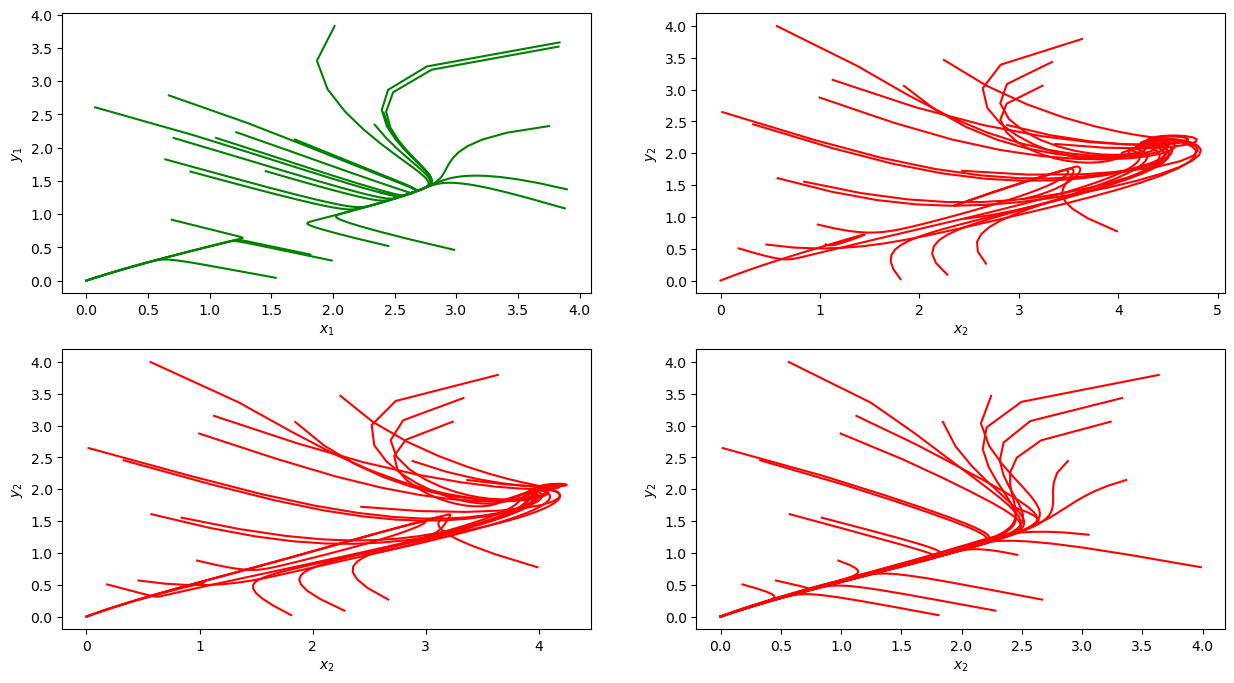

In [18]:
# Figure 7: phase space for different forest distances
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
   
# Parameters for each distance
params_container = [Dict{Symbol,Any}(
                        :ρ  => 4.2, 
                        :f  => 1.0,
                        :α₀ => -1.0, 
                        :w₀ =>  1.0,
                        :a₁ => 1.0, 
                        :h  => 2.0, 
                        :a₂ => 0.0, 
                        :d  => [d1], 
                        :l  => 600.0, 
                        :P₀ => 1.0, 
                        :β₁ => 0.0, 
                        :β₂ => 1.0,
                        :n  => 2)
                for d1 in [42, 150, 700]]

# generate random uniform data
n_points = 25
u0s = 4*rand(MersenneTwister(42), n_points, 2, 2);

# Number of timesteps in years for solver
T = 50

# Maps for plotting
d_row_map = [1, 2, 2]
d_col_map = [2, 1, 2] # (d_ix % 2) + 1
d_xlim_map = [(0, 5), (0, 4), (0, 3)]

# Iterate over parameter dicts and plot
for (d_ix, params) in enumerate(params_container)
    for point in 1:n_points
        u0 = u0s[point, :, :]
        two_forest_ds = n_forest_system(u0, params, (alg = Tsit5(), dtmax = 0.01))
        X, t = trajectory(two_forest_ds, T)
        X_tensor = reshape(Matrix(X), :, params[:n], 2)
        
        # Could generalize this phase space code to n-forests
        if d_ix == 1
            x1 = X_tensor[:, 1, 1]
            y1 = X_tensor[:, 1, 2]
            axs[1, 1].plot(x1, y1, color="green")
            axs[1, 1].set_xlabel(L"$x_1$")
            axs[1, 1].set_ylabel(L"$y_1$")
            #axs[1, 1].set_ylim((0, 3))
            #axs[1, 1].set_xlim((0, 4))
        end
        
        x2 = X_tensor[:, 2, 1]
        y2 = X_tensor[:, 2, 2]
        
        axs[d_row_map[d_ix], d_col_map[d_ix]].plot(x2, y2, color="red")
        axs[d_row_map[d_ix], d_col_map[d_ix]].set_xlabel(L"$x_2$")
        axs[d_row_map[d_ix], d_col_map[d_ix]].set_ylabel(L"$y_2$")
        #axs[d_row_map[d_ix], d_col_map[d_ix]].set_ylim((0, 3))
        #axs[d_row_map[d_ix], d_col_map[d_ix]].set_xlim(d_xlim_map[d_ix])
    end 
end

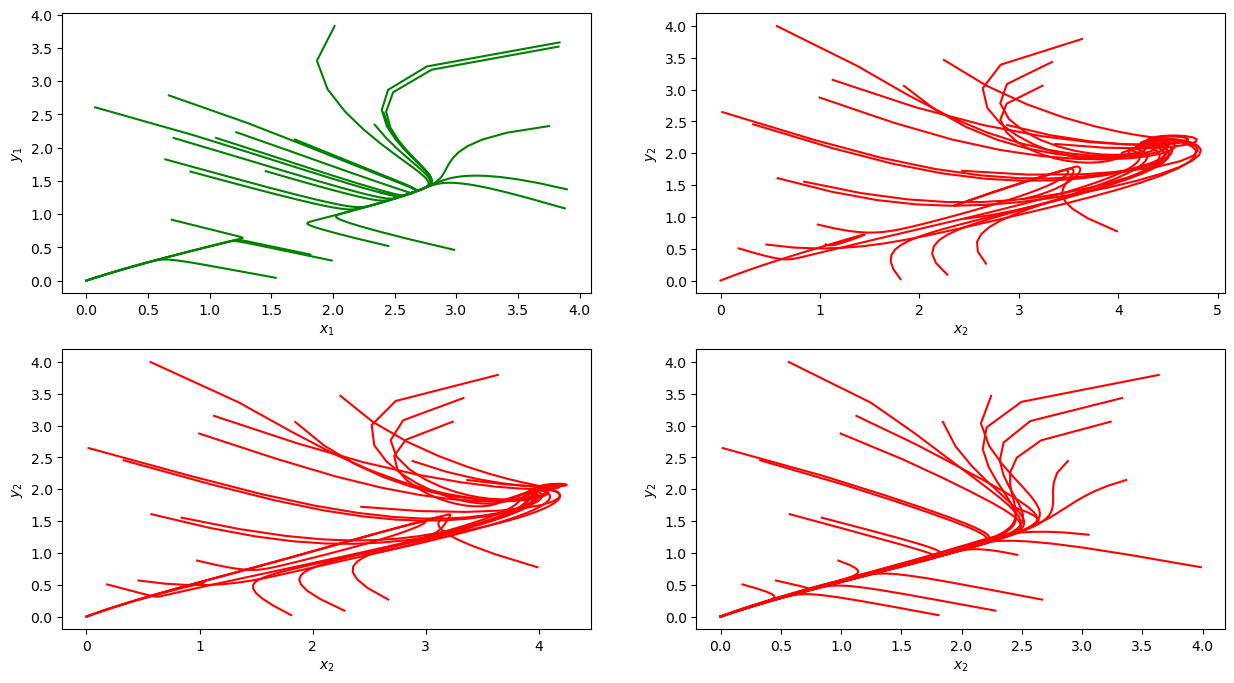

In [19]:
fig